In [ ]:
#Instalación de amply
!pip install -q amplpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.3 MB/s eta 0:00:00


In [ ]:
#Imports de librerias usadas
from amplpy import AMPL, tools, DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

ampl = tools.ampl_notebook(
    modules=["cplex", "scip", "gurobi"], # modules to install
    license_uuid="default") # license to use

# **Punto 1**

Teniendo en cuenta que el dataset provisto tiene 100 carácteristicas en total, resolveremos el problema de mejor subconjunto para $K \in \{0, 1, 2, \dots, 100\}$ y para cada solución obtenida calcularemos el MSE y el BIC para encontrar los respectivos valores de $K$ que minimicen los valores calculados.

In [ ]:
ampl = AMPL()
ampl.read("perspective.mod")
ampl.read_data("com_crime.dat")

In [ ]:
#Calcula el MSE para la solucion actual
def MSE():
  errorCuad = 0
  sumaInt = 0
  for i in range(1, 1994):
    sumaInt = y[i]
    for j in features0:
      sumaInt -= A[i,j]*x[j]
    errorCuad += sumaInt**2

  numObs = 1993 - len(respuesta)

  errorCuad = errorCuad/numObs
  return errorCuad

#Calcula el BIC para la solucion actual
def BIC():
  errorCuad = 0
  sumaInt = 0
  for i in range(1, 1994):
    sumaInt = y[i]
    for j in features0:
      sumaInt -= A[i,j]*x[j]
    errorCuad += sumaInt**2

  numObs = 1993
  numEscogidas = len(respuesta)

  bic = numObs*math.log(errorCuad/numObs)
  bic = bic + math.log(numObs)*numEscogidas
  return bic


In [ ]:
#Solucionamos el problema variando el valor de K entre 0 y 100

#Para encontrar el  valor de K que minimiza el MSE
minValor = 1
mejorK = -1

#Para encontrar el  valor de K que minimiza el BIC
minBic = 99999
mejorKBic = -1

#Almacenar todos los mses y bics
mses = []
bics = []

for i in range(0, 101):

  ampl = AMPL()
  ampl.read("perspective.mod")
  ampl.read_data("com_crime.dat")
  ampl.param["K"] =i
  ampl.option["solver"] = "cplex"
  ampl.setOption('cplex_options', 'timelimit=120')
  ampl.solve()

  A = ampl.get_parameter('A').get_values().to_dict()
  y = ampl.get_parameter('y').get_values().to_dict()
  x = ampl.get_variable('x').get_values().to_dict()
  features0 =  ampl.get_set('features0').get_values().to_list()
  respuesta = ampl.getVariable("z").get_values().toPandas()
  respuesta = respuesta[respuesta['z.val'] == 1]

  mse = MSE()
  bic = BIC()
  bics.append(bic)
  mses.append(mse)
  if(mse < minValor):
    minValor = mse
    mejorK =
  if(bic < minBic):
    minBic = bic
    mejorKBic = i

CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0: optimal solution; objective 221.0592
4 QP barrier iterations
No basis.
CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0: optimal integer solution; objective 53.0799942
7588 MIP simplex iterations
5 branch-and-bound nodes
No basis.
CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0: optimal integer solution; objective 51.44348013
8444 MIP simplex iterations
12 branch-and-bound nodes
No basis.
CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0: optimal integer solution; objective 51.37036336
8116 MIP simplex iterations
10 branch-and-bound nodes
No basis.
CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0: optimal integer solution; objective 48.59396677
90820 MIP simplex iterations
914 branch-and-bound nodes
absmipgap = 1.39804e-06, relmipgap = 2.87698e-08
No basis.
CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0: optimal integer solution; objective 51.70253606
2650 MIP simplex iterations
0 branch-and-bound nodes
No basis.
CPLEX 22.1.1.0: timelimit=120
CPLEX 22.1.1.0:

In [ ]:
#Exportar MSEs y BICs a archivos csv
import numpy as np

data = np.asarray(mses)
np.savetxt('data.csv', data, delimiter = ',')

bics = np.asarray(bics)
np.savetxt('dataBICS.csv', data, delimiter = ',')

##**Minimizar MSE**

In [ ]:
mejorK, mses[53]

Text(0.5, 1.0, 'MSE para cada valor de K (se omite K=0 pues su valor es muy grande)')

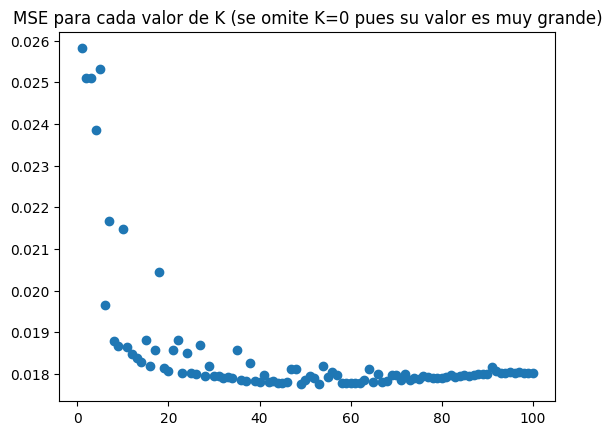

In [ ]:
#Grafica de los MSES
plt.scatter(x = np.arange(1, 101), y = mses[1:])
plt.title("MSE para cada valor de K (se omite K=0 pues su valor es muy grande)")

Text(0.5, 1.0, 'MSE por cada valor de K (aumentada)')

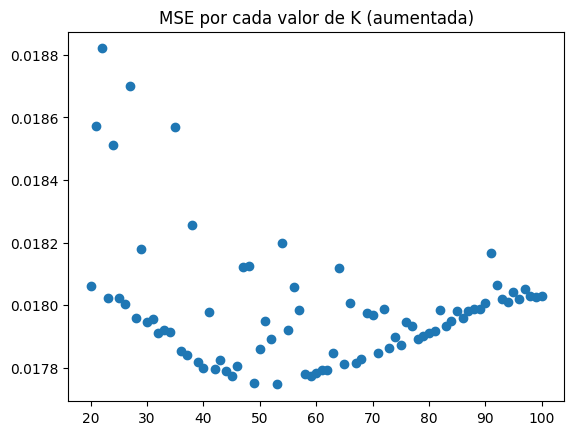

In [ ]:
#Grafica enfocada entre k = 20 y k = 101
plt.scatter(x = np.arange(20, 101), y = mses[20:])
plt.title("MSE por cada valor de K (aumentada)")

### **Solución:** El valor óptimo de K es 53 y tiene asociado un MSE de 0.017

## **Minimizar BIC**

In [ ]:
mejorKBic, bics[14]

(14, -7883.746640250204)

Text(0.5, 1.0, 'BIC por cada valor de K')

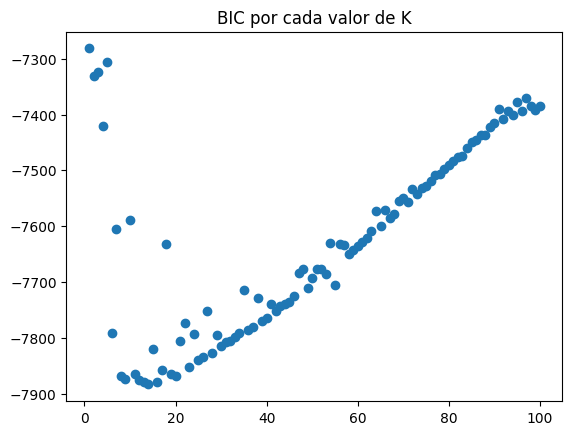

In [ ]:
#Grafica de los BICS
plt.scatter(x = np.arange(1, 101), y = bics[1:])
plt.title("BIC por cada valor de K")

Text(0.5, 1.0, 'BIC por iteracion (aumentada)')

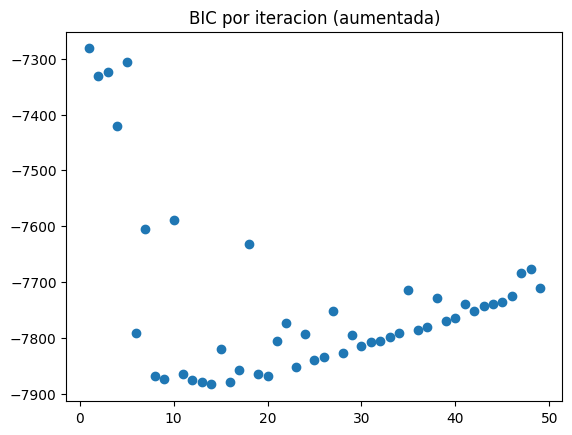

In [ ]:
#Grafica en la zona de interes
plt.scatter(x = np.arange(1, 50), y = bics[1:50])
plt.title("BIC por iteracion (aumentada)")

### **Solución:** El valor optimo de K es 14, con un BIC asociado de -7883.74

# **Punto 2**

A continuacion se presenta la formuacion matematica para cada uno de los literales del punto 2, sus respectivos codigos en ampl, archivo de datos y archivo .run se pueden encontrar adjuntos en la entrega.

### **Literal a**

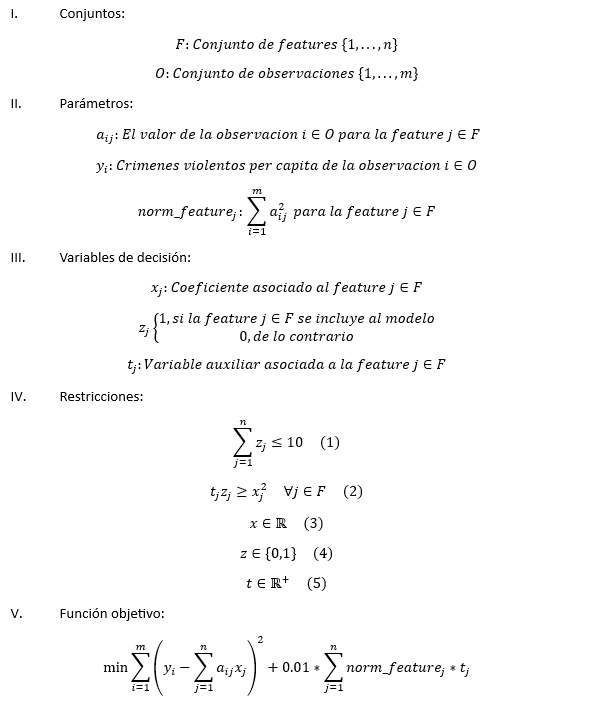

Al resolver este problema en ampl con los datos suministrados se obtiene una funcion objetivo de 45.2795 y que se deberian incluir las siguientes features con los siguentes coeficientes:


HousVacant.....0.37482

MedOwnCostPctIncNoMtg.....-0.08529

OtherPerCap.....0.0427068

PctIlleg.....0.594495

PctVacantBoarded.....0.0941882

indianPerCap.....0.00107677

pctUrban.....0.0331927

pctWRetire.....0.0616191

population.....-0.186673

racepctblack.....0.0974916

### **Literal b**

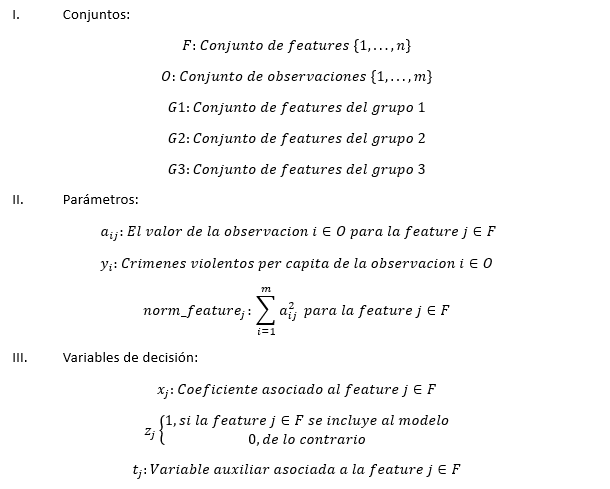

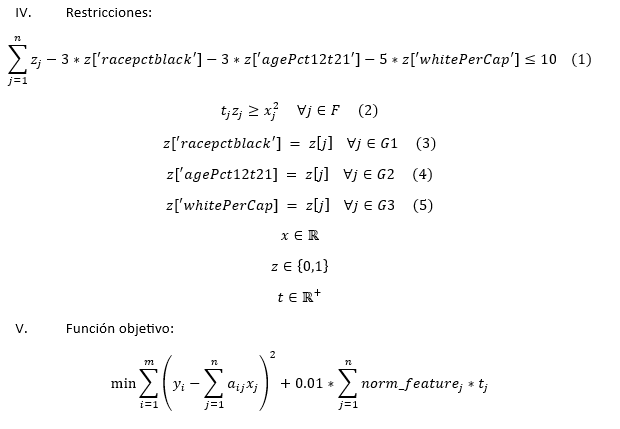

Al resolver este problema en ampl con los datos suministrados se obtiene una funcion objetivo de **37.5133** y que se deberian incluir las siguientes features con los siguentes coeficientes:

AsianPerCap.....0.0365297

HispPerCap.....0.0285243

HousVacant.....0.156965

MalePctDivorce.....0.196415

NumStreet.....0.196415

OtherPerCap.....0.0379602

PctIlleg.....0.25795

PctKids2Par.....-0.128126

PctPersDenseHous.....0.211521

agePct12t21.....0.0699631

agePct12t29.....-0.0556293

agePct16t24.....-0.0198296

agePct65up.....0.0777853

blackPerCap.....-0.0169948

indianPerCap.....-0.0307146

pctUrban.....0.0352543

racePctAsian.....0.0121595

racePctHisp.....0.0396777

racePctWhite.....-0.0053381

racepctblack.....0.194639

whitePerCap.....-0.0179513

### **Literal c**

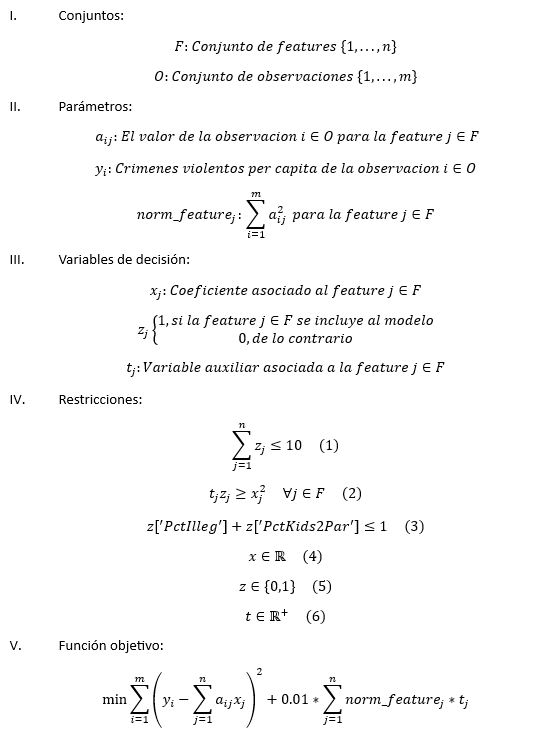

Al resolver este problema en ampl con los datos suministrados se obtiene una funcion objetivo de **39.085** y que se deberian incluir las siguientes features con los siguentes coeficientes:

HousVacant.....0.244029

MalePctDivorce.....0.201263

MedNumBR.....-0.01158

PctIlleg.....0.253547

PctPersDenseHous.....0.225505

PctTeen2Par.....-0.0408902

PersPerRentOccHous.....-0.00816592

pctWPubAsst.....0.0716294

racePctWhite.....-0.0109817

racepctblack.....0.206858

# **Punto 3**

1. b)
2. a)
3. c)
4. c)